Theory from video/notes/extra notes

# Implementation using sklearn

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, pydotplus
from sklearn import tree, metrics, model_selection, preprocessing
from IPython.display import Image, display


## Load and prep the data

In [33]:
# load the iris data
df = pd.read_csv('./data/iris.csv')

df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#checking for null
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [4]:
df.info() # species         is categorical only

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal_length    150 non-null float64
sepal_width     150 non-null float64
petal_length    150 non-null float64
petal_width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [5]:
df['species'].value_counts()   #containg 3 classes

Iris-versicolor    50
Iris-setosa        50
Iris-virginica     50
Name: species, dtype: int64

Observation: Data is clean

### Ploting Data( Data Exploration)

In [42]:
df.describe()
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

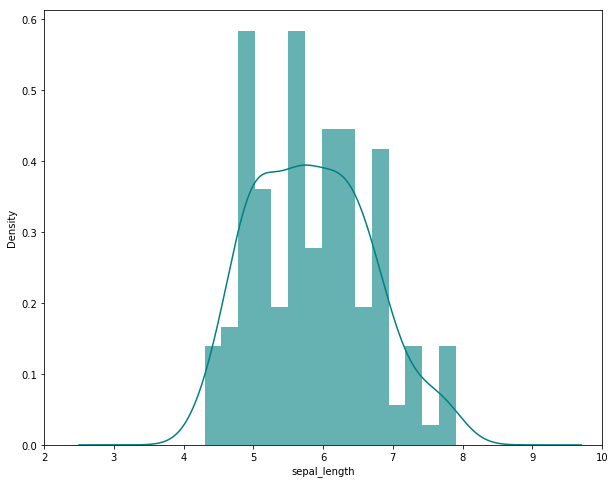

In [39]:
plt.figure(figsize=(10,8))
ax = df["sepal_length"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["sepal_length"].plot(kind='density', color='teal')
ax.set(xlabel='sepal_length')
plt.xlim(2,10)    # as in describe minimum is 33 and maximum is 94
plt.show()

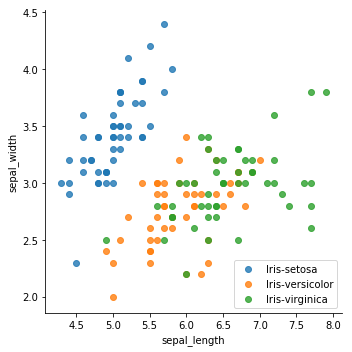

In [54]:
#Plotting All Together with seaborn
#Map a color per group

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sepal_length", y="sepal_width", data=df, fit_reg=False, hue='species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()



We can plot all together with basic scatter plot and seaborn pairplot after converting categorical variable to numeric categories

### Converstion of categories

In [56]:
#converting labeling to numeric categories----using pandas factorize()---- we can use labelencoder and all other also
df['species_label'], _ = pd.factorize(df['species'])

In [7]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species,species_label
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


#### Plotting all with respect to category

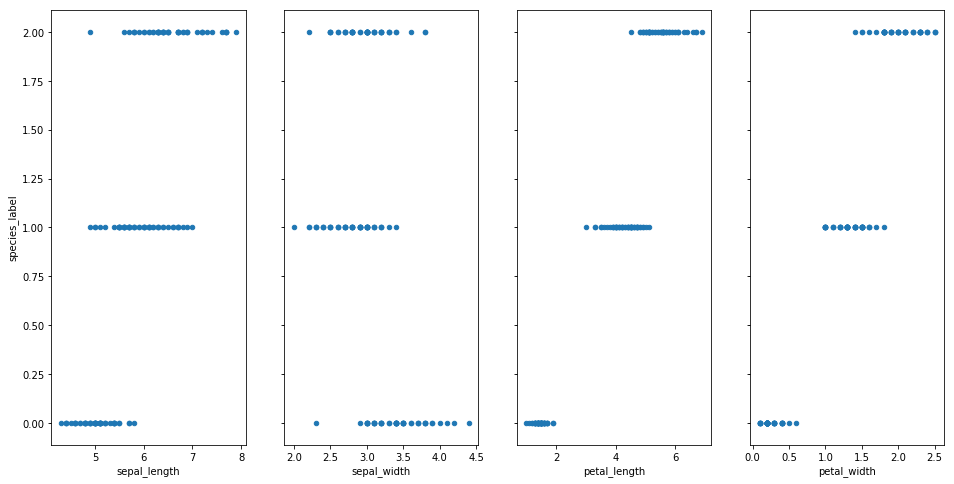

In [57]:
# visualize the relationship between the features and the iris class using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True)
df.plot(kind='scatter', x='sepal_length', y='species_label', ax=axs[0], figsize=(16, 8))
df.plot(kind='scatter', x='sepal_width', y='species_label', ax=axs[1])
df.plot(kind='scatter', x='petal_length', y='species_label', ax=axs[2])
df.plot(kind='scatter', x='petal_width', y='species_label', ax=axs[3])

##### 1.single using seaborn

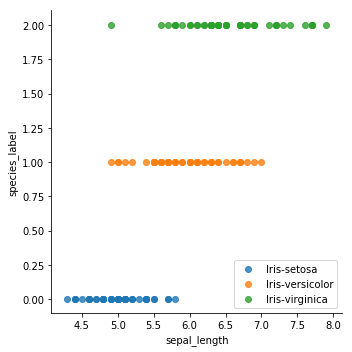

In [59]:
#Plotting All Together with seaborn
#Map a color per group

 
# Use the 'hue' argument to provide a factor variable
sns.lmplot( x="sepal_length", y="species_label", data=df, fit_reg=False, hue='species', legend=False)
 
# Move the legend to an empty part of the plot
plt.legend(loc='lower right')
 
#sns.plt.show()


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


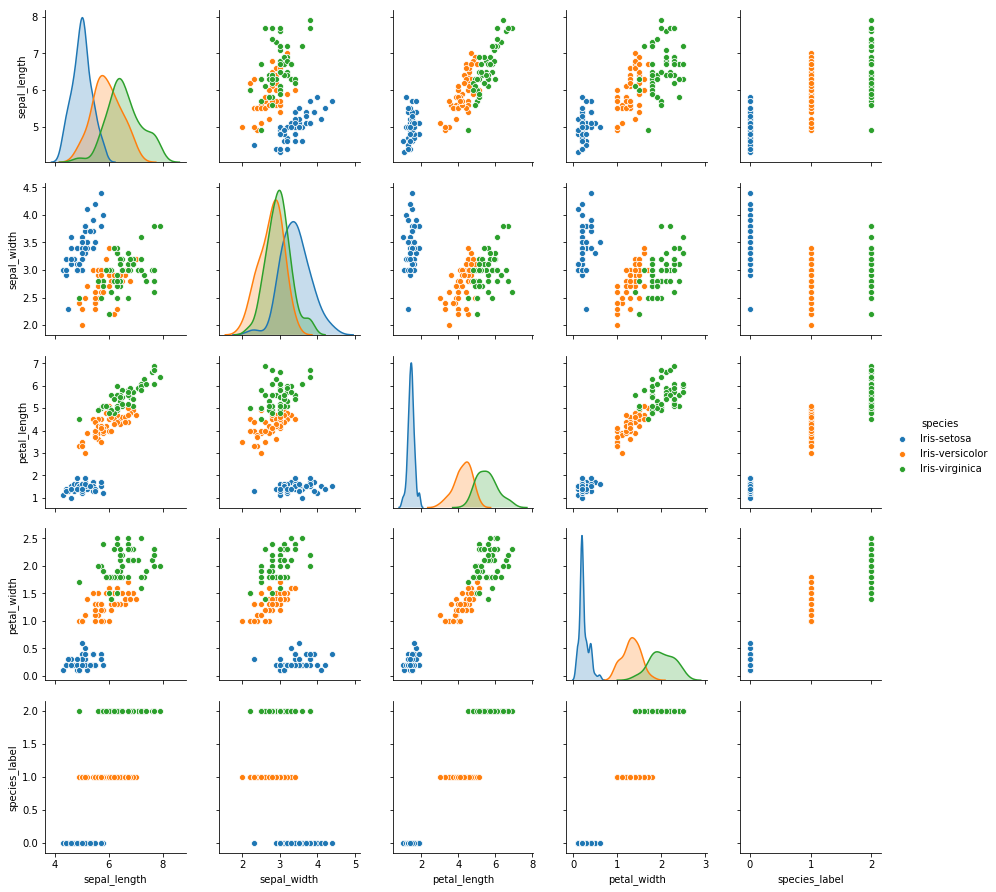

In [62]:
# Create the default pairplot
sns.pairplot(df, hue='species')

In [8]:
df['species_label'].value_counts()   # converted to 0,1,2 classes

2    50
1    50
0    50
Name: species_label, dtype: int64

In [67]:
import seaborn as sns
correlation_matrix = df.corr().round(2)

print("print correlation matrix of the above plot:\n")
correlation_matrix

print correlation matrix of the above plot:



,sepal_length,sepal_width,petal_length,petal_width,species_label
sepal_length,1.00,-0.11,0.87,0.82,0.78
sepal_width,-0.11,1.00,-0.42,-0.36,-0.42
petal_length,0.87,-0.42,1.00,0.96,0.95
petal_width,0.82,-0.36,0.96,1.00,0.96
species_label,0.78,-0.42,0.95,0.96,1.00


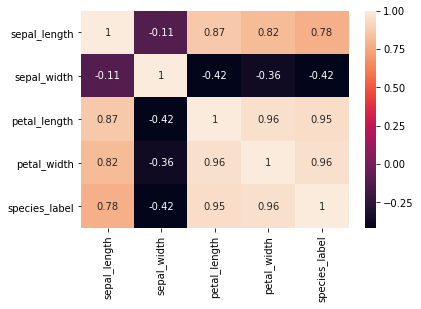

In [66]:
# seaborn heatmap can give correlation in a more presentable look
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [69]:
# select features
y = df['species_label']     #target
X = df[['sepal_length', 'petal_width']]

In [70]:
# split data randomly into 70% training and 30% test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

In [73]:
X_train.head()

,sepal_length,petal_width
137,6.4,1.8
84,5.4,1.5
27,5.2,0.2
127,6.1,1.8
132,6.4,2.2


### Train the model and make predictions
Note we didn't have to standardize the data to use a decision tree.

In [74]:
# train the decision tree
dtree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [75]:
# use the model to make predictions with the test data
y_pred = dtree.predict(X_test)

In [76]:
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

## Evaluate the model's performance
Including the tree's axis-parallel decision boundaries and how the tree splits

In [77]:
# how did our model perform?
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 1
Accuracy: 0.97


#### Visualization
For visualizing decision tree splits I am creating plot_decision() function below using matplotlib. If you dont understand the implementation completely that's fine. It is just for the understanding.

In [78]:
from matplotlib.colors import ListedColormap


def plot_decision(X, y, classifier, test_idx=None, resolution=0.02, figsize=(8,8)):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('#cc0000', '#003399', '#00cc00', '#999999', '#66ffff')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # get dimensions
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    xmin = xx1.min()
    xmax = xx1.max()
    ymin = xx2.min()
    ymax = xx2.max()
    
    # create the figure
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_xlim(xmin, xmax)
    ax.set_ylim(ymin, ymax)
    
    # plot the decision surface
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    ax.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap, zorder=1)
    
    # plot all samples
    for idx, cl in enumerate(np.unique(y)):
        ax.scatter(x=X[y == cl, 0], 
                   y=X[y == cl, 1],
                   alpha=0.6, 
                   c=cmap(idx),
                   edgecolor='black',
                   marker='o',#markers[idx],
                   s=50,
                   label=cl,
                   zorder=3)

    # highlight test samples
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        ax.scatter(X_test[:, 0],
                   X_test[:, 1],
                   c='w',
                   alpha=1.0,
                   edgecolor='black',
                   linewidths=1,
                   marker='o',
                   s=150, 
                   label='test set',
                   zorder=2)

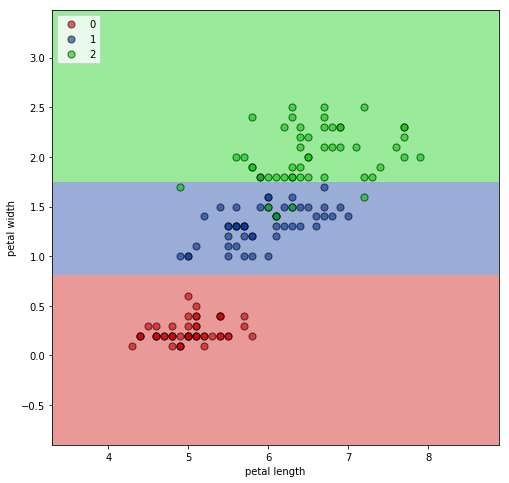

In [79]:
# visualize the model's decision regions to see how it separates the samples
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))
plot_decision(X=X_combined, y=y_combined, classifier=dtree)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

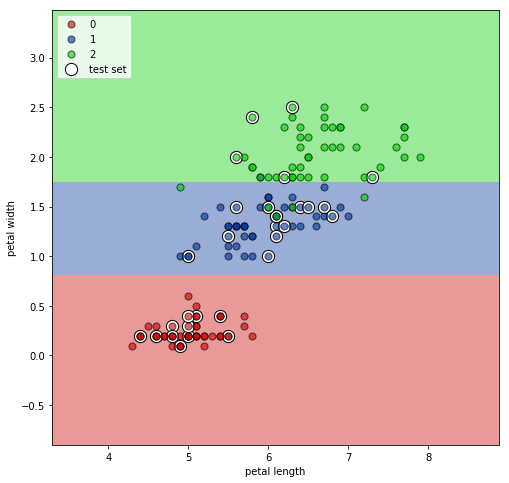

In [80]:
# same thing, but this time identify the points that constituted the test data set
test_idx = range(len(y_train), len(y_combined))
plot_decision(X=X_combined, y=y_combined, classifier=dtree, test_idx=test_idx)
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.legend(loc='upper left')
plt.show()

Now visualize how the tree splits using GraphViz (make sure you install it first):

#### Plotting Decision Tree

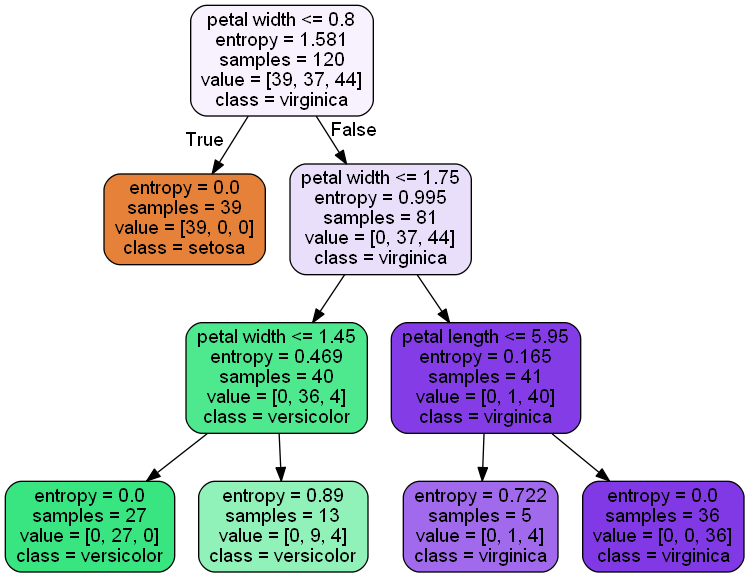

In [81]:
#Method 1. Ploting here using GraphViz
dot_data = tree.export_graphviz(dtree, out_file=None, filled=True, rounded=True,
                                feature_names=['petal length', 'petal width'],  
                                class_names=['setosa', 'versicolor', 'virginica'])
graph = pydotplus.graph_from_dot_data(dot_data)  
display(Image(graph.create_png()))

In [32]:
#Method 2. Getting Dump file (.dot) and ploting it on online website
tree.export_graphviz(dtree, out_file="mytree.dot")



It will give us a **mytree.dot** file in the same folder, we can plot this on a website **http://www.webgraphviz.com/**

In [ ]:
print (tree.export_graphviz.__doc__)    # for checking the documentation

# Cross Validation
Theory extra notes


## Holdout Validation and Cross Validation
Theory Extra Notes

In [82]:
from sklearn.cross_validation import KFold

cv = KFold(n=len(X),  # Number of elements
           n_folds=10,            # Desired number of cv folds
           random_state=12) 

In [83]:
fold_accuracy = []

# titanic_train["Sex"] = encoded_sex

for train_fold, valid_fold in cv:
    train = X.loc[train_fold] # Extract train data with cv indices
    valid = X.loc[valid_fold] # Extract valid data with cv indices
    
    train_y = y.loc[train_fold]
    valid_y = y.loc[valid_fold]
    
    model = dtree.fit(X = train, 
                           y = train_y)
    valid_acc = model.score(X = valid, 
                            y = valid_y)
    fold_accuracy.append(valid_acc)    

print("Accuracy per fold: ", fold_accuracy, "\n")
print("Average accuracy: ", sum(fold_accuracy)/len(fold_accuracy))

Accuracy per fold:  [1.0, 1.0, 1.0, 1.0, 0.9333333333333333, 0.9333333333333333, 1.0, 0.8666666666666667, 0.8, 1.0] 

Average accuracy:  0.9533333333333335


Model accuracy can vary significantly from one fold to the next, especially with small data sets, but the average accuracy across the folds gives you an idea of how the model might perform on unseen data. As with holdout validation, we'd like the target variable's classes to have roughly the same proportion across each fold when performing cross validation for a classification problem. To perform stratified cross validation, use the StratifiedKFold() function instead of KFold(). You use can score a model with stratified cross validation with a single function call with the cross_val_score() function:

In [84]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(estimator= dtree,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.86666667 1.         1.         1.        ]
Average accuracy:  0.9533333333333334


# Overfitting 

Overfitting is a practical problem while building a decision tree model. The model is having an issue of overfitting is considered when the algorithm continues to go deeper and deeper in the to reduce the training set error but results with an increased test set error i.e, Accuracy of prediction for our model goes down. It generally happens when it builds many branches due to outliers and irregularities in data.

#### Two approaches which we can use to avoid overfitting are:

   * Pre-Pruning
   * Post-Pruning


##### Pre-Pruning

In pre-pruning, it stops the tree construction bit early. It is preferred not to split a node if its goodness measure is below a threshold value. But it’s difficult to choose an appropriate stopping point.

##### Post-Pruning

In post-pruning first, it goes deeper and deeper in the tree to build a complete tree. If the tree shows the overfitting problem then pruning is done as a post-pruning step. We use a cross-validation data to check the effect of our pruning. Using cross-validation data, it tests whether expanding a node will make an improvement or not.

If it shows an improvement, then we can continue by expanding that node. But if it shows a reduction in accuracy then it should not be expanded i.e, the node should be converted to a leaf node.



<img src="images/pruning.png">

### Decision Tree Algorithm Advantages and Disadvantages

##### Advantages:

   * Decision Trees are easy to explain. It results in a set of rules.
   * It follows the same approach as humans generally follow while making decisions.
   * Interpretation of a complex Decision Tree model can be simplified by its visualizations. Even a naive person can understand logic.
   * The Number of hyper-parameters to be tuned is almost null.


##### Disadvantages:

   * There is a high probability of overfitting in Decision Tree.
   * Generally, it gives low prediction accuracy for a dataset as compared to other machine learning algorithms.
   * Information gain in a decision tree with categorical variables gives a biased response for attributes with greater no. of categories.
   * Calculations can become complex when there are many class labels.

# Practice : More type validation

GridSearchCV to search the best estimater with different criterion

In [88]:
from sklearn.grid_search import GridSearchCV

parameters_dict = {"max_depth": [2,5,6,10], "min_samples_split" : [0.1, 0.2, 0.3, 0.4], "min_samples_leaf" : [0.1, 0.2, 0.3, 0.4], "criterion": ["gini","entropy"]}

dtc_model = tree.DecisionTreeClassifier(random_state= 0)

grid_obj = GridSearchCV(estimator=dtc_model,param_grid=parameters_dict, cv=10)

grid_obj.fit(X_train, y_train)

#Extract the best classifier
best_clf = grid_obj.best_estimator_
best_clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=0.1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [98]:
scores = cross_val_score(estimator= dtc_model,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[1.         0.93333333 1.         0.93333333 0.86666667 0.8
 0.86666667 0.93333333 1.         0.93333333]
Average accuracy:  0.9266666666666667


In [93]:
#after changing paramenter
parameters={'min_samples_split' : [0.1, 0.2, 0.3, 0.4],'max_depth': [2,5,6,10,15]}
clf_tree=tree.DecisionTreeClassifier()
clf=GridSearchCV(clf_tree,parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'min_samples_split': [0.1, 0.2, 0.3, 0.4], 'max_depth': [2, 5, 6, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [95]:
clf.predict(X_test)   # to predict by the best selected model on the given criteria

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0], dtype=int64)

In [97]:
dt_model = clf.best_estimator_     # find best estimater 
print(dt_model)        # to print the best fitted tree model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=0.1,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')


In [100]:
scores = cross_val_score(estimator= dt_model,     # Model to test
                X= X,  
                y = y,      # Target variable
                scoring = "accuracy",               # Scoring metric    
                cv=10)                              # Cross validation folds

print("Accuracy per fold: ")
print(scores)
print("Average accuracy: ", scores.mean())

Accuracy per fold: 
[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.86666667 1.         1.         1.        ]
Average accuracy:  0.9533333333333334


###### can use GridSearchCV like below with "StratifiedKFold" instead of Kfold

In [111]:
from sklearn.model_selection import StratifiedKFold
decision_tree_classifier = tree.DecisionTreeClassifier()

parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

cross_validation = StratifiedKFold(n_splits=10)
cross_validation.get_n_splits(X_train, y_train)

grid_search = GridSearchCV(decision_tree_classifier, param_grid = parameter_grid,
                          cv = cross_validation)

grid_search.fit(X_train, y_train)

print ("Best Score: {}".format(grid_search.best_score_))
print ("Best params: {}".format(grid_search.best_params_))

TypeError: 'StratifiedKFold' object is not iterable